# Geoprocessing and Mapping

Agenda:
- continuation of python mapping and geoprocessing with geopandas
- getting centroids
- computing distances
- Processing GeoJson data from APIs



What are some example applications you might use geoprocessing operations in?

- buffering
- overlays
- distance calculations

In [2]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from scipy import ndimage
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = 10, 8

import warnings 
warnings.filterwarnings('ignore')

### First, reprocess data from previous session

In [5]:
blocks = gpd.read_file('data/geo_export_9702b0bc-dfe0-42aa-bab9-e9ca83abd50f.shp')

print(type(blocks))
print(blocks.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
  countyfp10    intptlon10 blockce10 tractce10   intptlat10      name10  \
0        001  -122.2564001      2005    422500  +37.8760481  Block 2005   
1        001  -122.2630010      3001    422800  +37.8677659  Block 3001   
2        001  -122.2638664      3008    422800  +37.8658164  Block 3008   
3        001  -122.2636773      3009    423602  +37.8621680  Block 3009   
4        001  -122.2602461      2000    422800  +37.8681223  Block 2000   

           geoid10  aland10  awater10 mtfcc10 statefp10  \
0  060014225002005  10537.0       0.0   G5040        06   
1  060014228003001  11761.0       0.0   G5040        06   
2  060014228003008  10506.0       0.0   G5040        06   
3  060014236023009  19893.0       0.0   G5040        06   
4  060014228002000  21110.0       0.0   G5040        06   

                                            geometry  
0  POLYGON ((-122.2559250023598 37.87657699839653...  
1  POLYGON ((-122.2623200015607 37.867

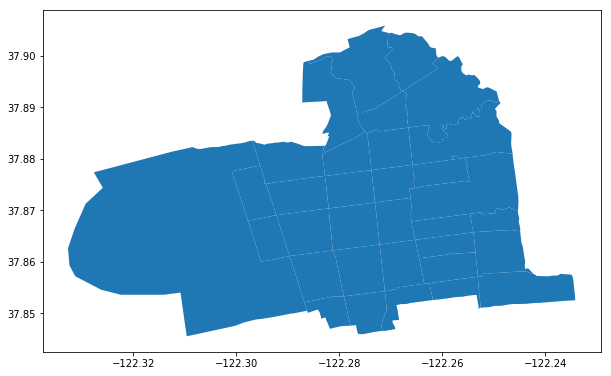

In [7]:
tracts = blocks.dissolve(by='tractce10')
tracts.plot();

In [8]:
tracts.crs = {'init' :'epsg:4326'}
# or alternatively:
tracts.crs = blocks.crs
print(tracts.crs)

{'init': 'epsg:4326'}


In [9]:
vandalism = pd.read_csv('data/311_Cases.csv').dropna()
vandalism.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,City,State,Neighborhood,InDbDate,Latitude,Longitude,Location
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,Berkeley,CA,Berkeley,10/27/2016 04:12:43 AM,37.873666,-122.272719,"(37.873666, -122.272719)"
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:14:21 AM,37.854388,-122.291846,"(37.854388, -122.291846)"
6,121000291163,04/01/2016 02:32:13 PM,Closed,04/28/2016 01:57:26 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,056 192000701,1322 CHANNING WAY,Berkeley,CA,Berkeley,10/27/2016 04:14:38 AM,37.863296,-122.285123,"(37.863296, -122.285123)"
14,121000254095,07/15/2015 04:41:04 PM,Closed,07/17/2015 12:47:16 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,058 217102600,1631 M L KING JR WAY,Berkeley,CA,Berkeley,10/27/2016 04:13:03 AM,37.876757,-122.273231,"(37.876757, -122.273231)"
17,121000197476,06/06/2014 07:08:52 AM,Closed,06/12/2014 11:59:16 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,059 232701100,1484 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:17:44 AM,37.875817,-122.299396,"(37.875817, -122.299396)"


In [10]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(vandalism.Longitude, vandalism.Latitude)]
geovandalism = GeoDataFrame(vandalism, crs=crs, geometry=geometry)
geovandalism.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,City,State,Neighborhood,InDbDate,Latitude,Longitude,Location,geometry
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,Berkeley,CA,Berkeley,10/27/2016 04:12:43 AM,37.873666,-122.272719,"(37.873666, -122.272719)",POINT (-122.2727192 37.87366564)
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:14:21 AM,37.854388,-122.291846,"(37.854388, -122.291846)",POINT (-122.29184559 37.85438802)
6,121000291163,04/01/2016 02:32:13 PM,Closed,04/28/2016 01:57:26 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,056 192000701,1322 CHANNING WAY,Berkeley,CA,Berkeley,10/27/2016 04:14:38 AM,37.863296,-122.285123,"(37.863296, -122.285123)",POINT (-122.28512347 37.86329594)
14,121000254095,07/15/2015 04:41:04 PM,Closed,07/17/2015 12:47:16 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,058 217102600,1631 M L KING JR WAY,Berkeley,CA,Berkeley,10/27/2016 04:13:03 AM,37.876757,-122.273231,"(37.876757, -122.273231)",POINT (-122.27323113 37.87675705)
17,121000197476,06/06/2014 07:08:52 AM,Closed,06/12/2014 11:59:16 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,059 232701100,1484 SEVENTH ST,Berkeley,CA,Berkeley,10/27/2016 04:17:44 AM,37.875817,-122.299396,"(37.875817, -122.299396)",POINT (-122.29939598 37.87581733)


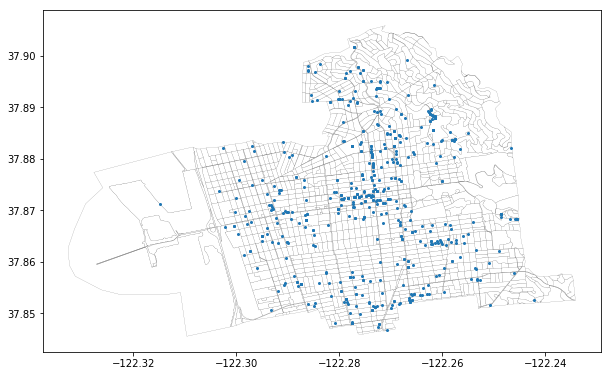

In [11]:
base = blocks.plot(color='white', edgecolor='black', linewidth=.1)
geovandalism.plot(ax=base, markersize=4);

In [12]:
# http://spatialreference.org/ref/sr-org/6787/
mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
geovandalism_proj = geovandalism.to_crs(mtc_crs)
blocks_proj = blocks.to_crs(mtc_crs)
tracts_proj = tracts.to_crs(mtc_crs)
tracts_proj.crs

'+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '

In [24]:
# If you get an error in the cell below this one, uncomment the pip install line here and run it
#!pip install rtree

In [13]:
geovandalism_proj_blocks = gpd.sjoin(geovandalism_proj, blocks_proj, how="inner", op='intersects')
geovandalism_proj_blocks.head()

,Case_ID,Date_Opened,Case_Status,Date_Closed,Request_Category,Request_SubCategory,Request_Detail,Object_Type,APN,Street_Address,...,intptlon10,blockce10,tractce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10
3,121000245255,05/08/2015 03:46:52 PM,Closed,05/11/2015 08:07:42 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
576,121000245291,05/11/2015 08:06:20 AM,Closed,05/27/2015 03:07:12 PM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Traffic Maintenance,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
1137,121000308818,08/07/2016 10:28:57 AM,Closed,08/24/2016 08:20:27 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205701202,1901 HEARST AVE,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
1159,121000209814,08/26/2014 03:46:38 PM,Closed,08/28/2014 07:10:24 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,057 205700100,1801 M L KING JR WAY,...,-122.2726875,2002,422400,+37.8738479,Block 2002,060014224002002,9514.0,0.0,G5040,06
4,121000282834,02/04/2016 12:48:53 PM,Closed,08/22/2016 11:14:35 AM,Graffiti and Vandalism,Graffiti,Graffiti Abatement - Internet Request,Property,053 165802200,2827 SEVENTH ST,...,-122.2916534,1077,422000,+37.8545176,Block 1077,060014220001077,20096.0,0.0,G5040,06


In [14]:
tract_v = geovandalism_proj_blocks.groupby('tractce10')['Case_ID'].count().to_frame(name='total_vandalism').reset_index()
tract_v.head()

,tractce10,total_vandalism
0,421100,1
1,421200,33
2,421300,26
3,421400,11
4,421500,33


In [15]:
tracts2 = pd.merge(tracts,tract_v, left_index=True, right_on='tractce10')
tracts2.head()

,geometry,countyfp10,intptlon10,blockce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10,tractce10,total_vandalism
0,POLYGON ((-122.2656260011422 37.89447000181859...,001,-122.2674866,1003,+37.9027036,Block 1003,060014211001003,38637.0,0.0,G5040,06,421100,1
1,"POLYGON ((-122.272511001732 37.89024500110148,...",001,-122.2738568,2031,+37.8905923,Block 2031,060014212002031,1001.0,0.0,G5040,06,421200,33
2,POLYGON ((-122.2826779989936 37.88124899880757...,001,-122.2800289,1016,+37.8946257,Block 1016,060014213001016,22880.0,0.0,G5040,06,421300,26
3,POLYGON ((-122.2668380004826 37.88819300118777...,001,-122.2762701,2005,+37.8875182,Block 2005,060014214002005,929.0,0.0,G5040,06,421400,11
4,POLYGON ((-122.2661620001346 37.88608300110354...,001,-122.2558725,1015,+37.8963428,Block 1015,060014215001015,3894.0,0.0,G5040,06,421500,33


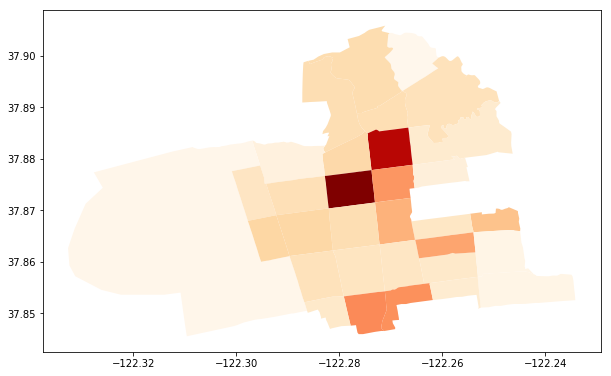

In [17]:
tracts2['van_sqmi'] = tracts2['total_vandalism']/tracts2.area/27878400
tracts2.plot(column='van_sqmi', cmap='OrRd')

In [18]:
bart = gpd.read_file('data/BART_Sta_13.shp')
bart.head()

,STATION,OPERATOR,DIST,CO,geometry
0,NORTH BERKELEY,BART,4,ALA,POINT (-122.283347881478 37.87406119520771)
1,DOWNTOWN BERKELEY,BART,4,ALA,POINT (-122.268249538332 37.86968943870814)
2,ASHBY,BART,4,ALA,POINT (-122.2701189608313 37.85320737930983)
3,ROCKRIDGE,BART,4,ALA,POINT (-122.2517773834424 37.84450968784791)
4,MACARTHUR,BART,4,ALA,POINT (-122.2671204422818 37.82870504871252)


In [19]:
bart_proj = bart.to_crs(blocks_proj.crs)

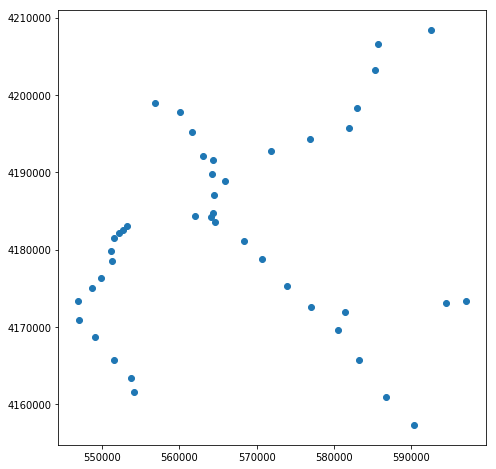

In [20]:
bart_proj.plot()

In [156]:
bart_berkeley = gpd.sjoin(bart_proj, blocks_proj, how="inner", op='intersects')
bart_berkeley

,STATION,OPERATOR,DIST,CO,geometry,index_right,countyfp10,intptlon10,blockce10,tractce10,intptlat10,name10,geoid10,aland10,awater10,mtfcc10,statefp10
0,NORTH BERKELEY,BART,4,ALA,POINT (563028.0000003229 4192083.999982029),264,001,-122.2834613,1018,422200,+37.8738420,Block 1018,060014222001018,14222.0,0.0,G5040,06
1,DOWNTOWN BERKELEY,BART,4,ALA,POINT (564359.6875347332 4191609.250012103),882,001,-122.2692393,2013,422900,+37.8697012,Block 2013,060014229002013,22107.0,0.0,G5040,06
2,ASHBY,BART,4,ALA,POINT (564209.5624836758 4189779.249962593),1167,001,-122.2702939,2003,423901,+37.8533054,Block 2003,060014239012003,29324.0,0.0,G5040,06


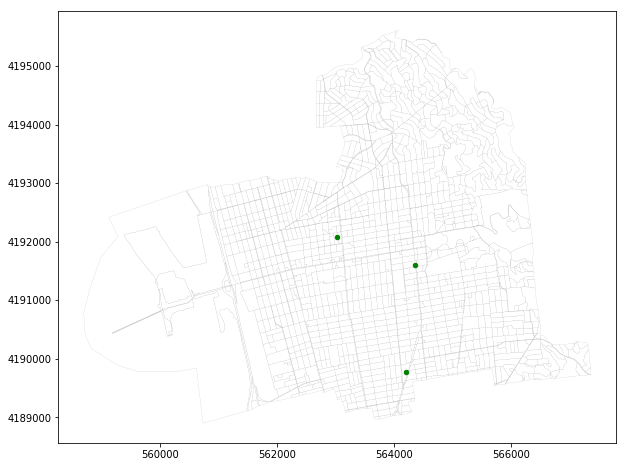

In [157]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
bart_berkeley.plot(ax=base, color='green', markersize = 20);

In [23]:
bart_berkeley.crs

'+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '

OK, we're using meters so 1/2 KM gives us a buffer distance of 500 in meter units.

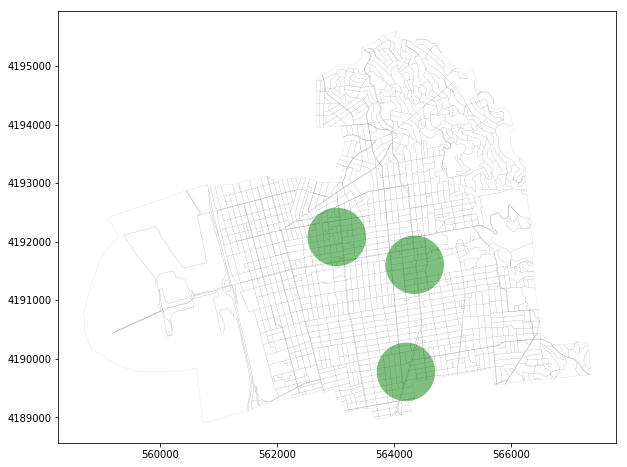

In [24]:
bart_buffer = bart_berkeley['geometry'].buffer(500)
base = blocks_proj.plot(color='none', edgecolor='gray', linewidth=.1)
bart_buffer.plot(ax=base, color='green', alpha=.5);

### Making a GeoDataFrame from a GeoSeries

Some spatial operations are easier to handle if the data are GeoDataFrames.  The buffering operation creates a GeoSeries.  Let's inspect it.

In [25]:
print(bart_buffer)

0    POLYGON ((563528.0000003229 4192083.999982029,...
1    POLYGON ((564859.6875347332 4191609.250012103,...
2    POLYGON ((564709.5624836758 4189779.249962593,...
dtype: object


Below we create a GeoDataFrame from the buffers.  We also label them.  I inferred the names from the relative coordinates.

In [26]:
bart_buffer_df = gpd.GeoDataFrame({'geometry': bart_buffer, 'bart_buffer_df':['North \n Berkeley','Downtown \n Berley','Ashby']})
print(bart_buffer_df)

       bart_buffer_df                                           geometry
0   North \n Berkeley  POLYGON ((563528.0000003229 4192083.999982029,...
1  Downtown \n Berley  POLYGON ((564859.6875347332 4191609.250012103,...
2               Ashby  POLYGON ((564709.5624836758 4189779.249962593,...


Below we assign the crs since it is already projected (you can look at the coordinates in the geometry column to verify).  The buffering operation just does not retain the crs.

In [27]:
print(bart_buffer_df.crs)

None


In [28]:
bart_buffer_df.crs = blocks_proj.crs
print(bart_buffer_df.crs)

+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs 


### Adding Annotation to a Map - Bart Station Names

Below we find a representative point inside each BART station buffer, and use it to position a label centered inside the buffer, with the Station Name.

In [29]:
bart_buffer_df['coords'] = bart_buffer_df['geometry'].apply(lambda x: x.representative_point().coords[:])
bart_buffer_df['coords'] = [coords[0] for coords in bart_buffer_df['coords']]
print(bart_buffer_df.columns)
print(bart_buffer_df)

Index(['bart_buffer_df', 'geometry', 'coords'], dtype='object')
       bart_buffer_df                                           geometry  \
0   North \n Berkeley  POLYGON ((563528.0000003229 4192083.999982029,...   
1  Downtown \n Berley  POLYGON ((564859.6875347332 4191609.250012103,...   
2               Ashby  POLYGON ((564709.5624836758 4189779.249962593,...   

                                    coords  
0  (563028.0000003229, 4192108.5042671114)  
1  (564359.6875347332, 4191633.7542971857)  
2  (564209.5624836758, 4189803.7542476756)  


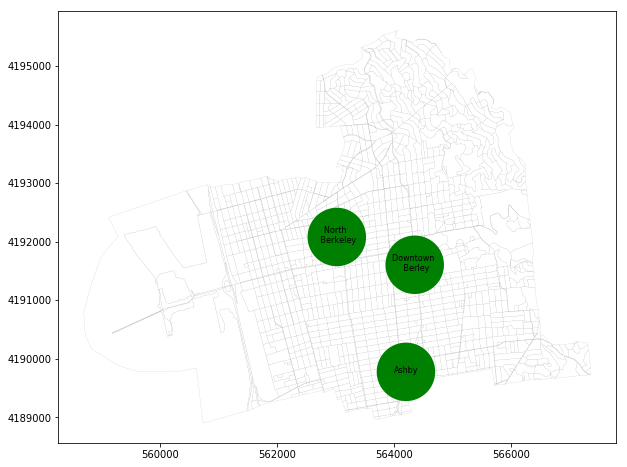

In [30]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
bart_buffer.plot(ax=base, color='green', markersize = 5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=8)

### Spatial Overlays

Spatial joins and overlays are very similar. Joins are like merges in Pandas but with GeoDataFrames, so they result in different sets being included in the resulting merge.  Spatial joins are useful for merging point and polygon layers for example, by identifying which points fall into which polygons, and then determining what to do about these relationships based on the operation requested.  

Overlays are more general geoprocessing operations using set theory to produce a geometric result that contains different combinations of the inputs, and are particularly useful if you want to operate on two polygon sets or lines and polygons.

We woud import the relevant methods like this:

from geopandas.tools import overlay

The geopandas.tools.overlay function takes three arguments:

* df1
* df2
* how

Where how can be one of:

['intersection',
'union',
'identity',
'symmetric_difference',
'difference']

These correspond in set theory to A & B, A or B, A, Not (A or B),  A & (Not B):

| Operation    | Set Equivalent |
|--------------|----------------|
| Intersection | A & B |
| Union        | A or B |
| Identity     | A      |
| Symmetric Difference | Not (A & B) |
| Difference | A & (Not B) |

Below, courtesy of QGIS documentation, is a visual explanation of the different kinds of spatial overlay operations.


In [148]:
from IPython.core.display import Image 
Image(url="http://docs.qgis.org/testing/en/_images/overlay_operations.png")

Let's try these operations out on a modest size dataset (e.g. NOT parcels) so see them in action.

**Start with union operations.  How does the result change depending on the order of the left and right dataframe?**

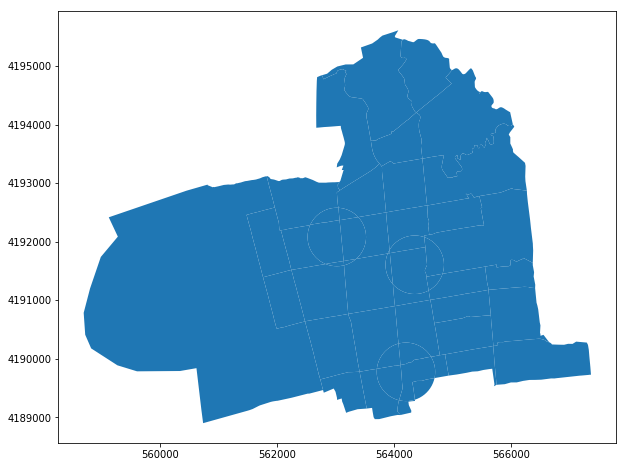

In [145]:
gpd.overlay(tracts_proj, bart_buffer_df, how='union').plot()

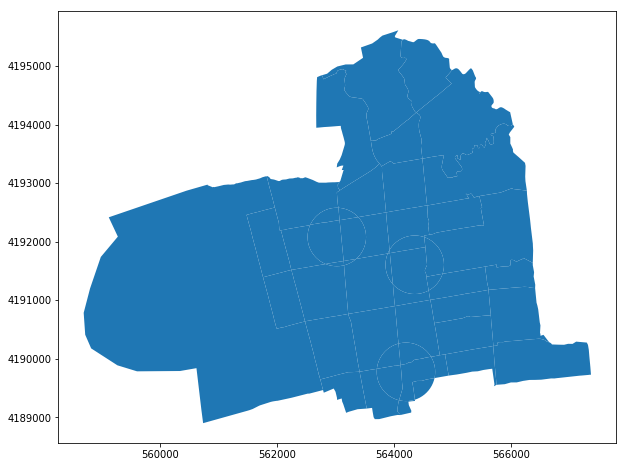

In [149]:
gpd.overlay(bart_buffer_df, tracts_proj, how='union').plot()

**OK, how about the identity operator? How does it compare to union?**

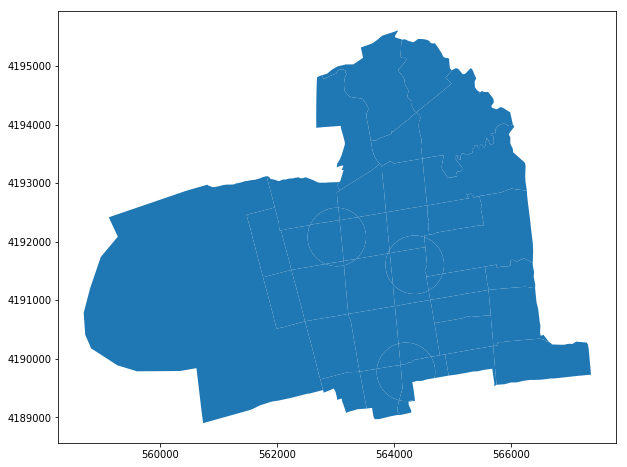

In [148]:
gpd.overlay(tracts_proj, bart_buffer_df, how='identity').plot()

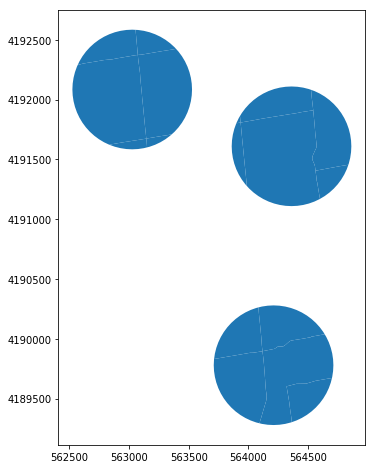

In [158]:
gpd.overlay(bart_buffer_df, tracts_proj, how='identity').plot()

** And how does that result compare to intersection?**

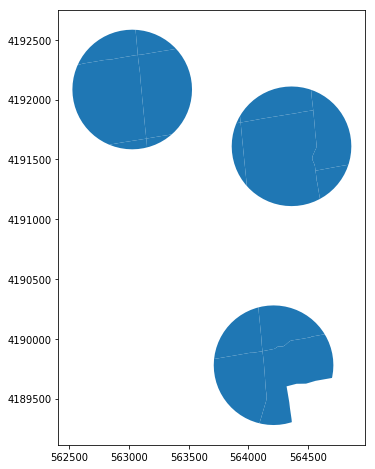

In [144]:
gpd.overlay(tracts_proj, bart_buffer_df, how='intersection').plot()

**Now compare intersection to symmetric difference.  What is the relationship?**

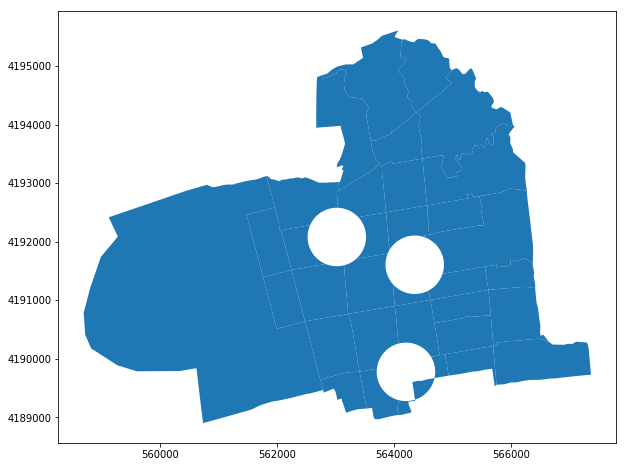

In [146]:
gpd.overlay(tracts_proj, bart_buffer_df, how='symmetric_difference').plot()

** And finally, how does that compare to the difference operator?**

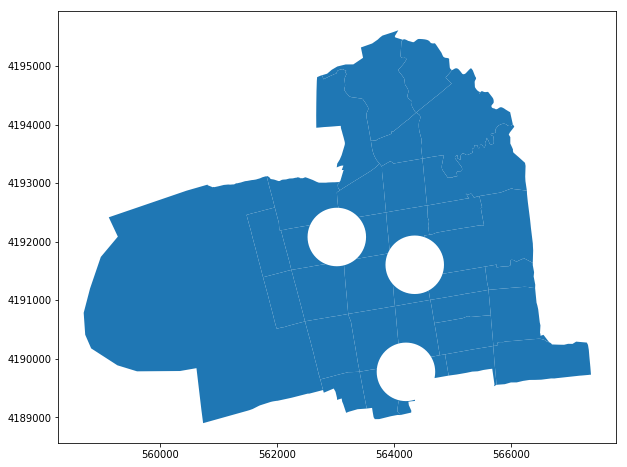

In [147]:
gpd.overlay(tracts_proj, bart_buffer_df, how='difference').plot()

### Loading Parcel Data - Larger Datasets

Now we redo a bit of the work done above, using parcels -- a common use case, but one that requires more processing.

In [140]:
parcels = gpd.read_file('data/geo_export_f6c584bc-6928-4713-8022-44eef9a6b3ef.shp')
print(parcels.head())
print(parcels.shape)
print(parcels.geometry.name)

       city state  lotsqft    zip    streetname        x_min condo  \
0  BERKELEY    CA   2925.0  94703    CALIFORNIA  563724.9312    NO   
1  BERKELEY    CA   3000.0  94703    CALIFORNIA  563758.6227    NO   
2  BERKELEY    CA   6750.0  94703  SIXTY-SECOND  563706.4447    NO   
3  BERKELEY    CA   3825.0  94703    CALIFORNIA  563721.1548    NO   
4  BERKELEY    CA   3750.0  94703  SIXTY-SECOND  563754.9907    NO   

    longitude         y_max  streetnum  \
0 -122.275596  4.188983e+06     3408.0   
1 -122.275217  4.188988e+06     3409.0   
2 -122.275786  4.189002e+06     1536.0   
3 -122.275633  4.189004e+06     3400.0   
4 -122.275250  4.189010e+06     1600.0   

                         ...                         usecd streetsufx  unit  \
0                        ...                            22         ST         
1                        ...                            11         ST         
2                        ...                            22         ST         
3         

In [141]:
parcels_proj = parcels.to_crs(blocks_proj.crs)
parcels_proj.head()

,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,usecd,streetsufx,unit,usedscrp,shape_star,bldgarea,y_min,parcelid,x_max,geometry
0,BERKELEY,CA,2925.0,94703,CALIFORNIA,563724.9312,NO,-122.275596,4.188983e+06,3408.0,...,22,ST,,DOUBLE OR DUPLEX TYPE- 2U,274.451904,2320.0,4.188962e+06,052 143600102,563743.0167,"POLYGON ((563743.0167004069 4188964.865184802,..."
1,BERKELEY,CA,3000.0,94703,CALIFORNIA,563758.6227,NO,-122.275217,4.188988e+06,3409.0,...,11,ST,,SINGLE FAMILY RESIDENTIAL,243.980469,1678.0,4.188969e+06,052 143501200,563776.0498,"POLYGON ((563776.049800408 4188972.073784799, ..."
2,BERKELEY,CA,6750.0,94703,SIXTY-SECOND,563706.4447,NO,-122.275786,4.189002e+06,1536.0,...,22,ST,,DOUBLE OR DUPLEX TYPE- 2U,595.060059,1885.0,4.188960e+06,052 143600200,563727.8409,"POLYGON ((563724.9312004079 4188980.0040848, 5..."
3,BERKELEY,CA,3825.0,94703,CALIFORNIA,563721.1548,NO,-122.275633,4.189004e+06,3400.0,...,24,ST,,FOURPLEX OR TRIPLEX W/SFR,332.613281,2640.0,4.188980e+06,052 143600101,563739.9508,"POLYGON ((563739.9508004077 4188982.6154848, 5..."
4,BERKELEY,CA,3750.0,94703,SIXTY-SECOND,563754.9907,NO,-122.275250,4.189010e+06,1600.0,...,11,ST,,SINGLE FAMILY RESIDENTIAL,335.715088,1694.0,4.188985e+06,052 143501300,563773.4997,"POLYGON ((563773.4997004068 4188987.627584798,..."


In [108]:
print(parcels_proj.geometry.name)
print(bart_buffer_df.geometry.name)


geometry
geometry


### Doing a Spatial Join of Parcels and BART Station Buffers

In [131]:
bart_parcels = gpd.sjoin(parcels_proj, bart_buffer_df, how="inner", op='intersects')
bart_parcels.head()

,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,bldgarea,y_min,parcelid,x_max,geometry,centroid,min_dist_to_bart,index_right,bart_buffer_df,coords
348,BERKELEY,CA,4350.0,94703,ALCATRAZ,564273.9834,NO,-122.269333,4.189305e+06,1896.0,...,4070.0,4.189268e+06,052 152700104,564291.1585,"POLYGON ((564291.158500411 4189270.094384756, ...",POINT (564282.5780900089 4189286.457502856),498.172347,2,Ashby,"(564209.5624836758, 4189803.7542476756)"
352,BERKELEY,CA,4290.0,94703,ALCATRAZ,564285.5038,NO,-122.269204,4.189306e+06,1898.0,...,4120.0,4.189270e+06,052 152700103,564302.5413,"POLYGON ((564302.5413004122 4189271.922284754,...",POINT (564293.9251079067 4189288.214953219),498.229297,2,Ashby,"(564209.5624836758, 4189803.7542476756)"
361,BERKELEY,CA,4814.0,94703,ALCATRAZ,564313.1014,NO,-122.268868,4.189312e+06,1908.0,...,7772.0,4.189279e+06,052 136400100,564342.1719,"POLYGON ((564329.1102004121 4189287.187584753,...",POINT (564323.443789856 4189294.018956118),498.415571,2,Ashby,"(564209.5624836758, 4189803.7542476756)"
364,BERKELEY,CA,3480.0,94703,ALCATRAZ,564325.0912,NO,-122.268755,4.189314e+06,1916.0,...,1269.0,4.189285e+06,052 136400200,564341.6476,"POLYGON ((564341.6476004128 4189285.694984753,...",POINT (564333.2748065973 4189299.949726442),495.008541,2,Ashby,"(564209.5624836758, 4189803.7542476756)"
370,BERKELEY,CA,4120.0,94703,ALCATRAZ,564336.6193,NO,-122.268618,4.189316e+06,1918.0,...,4789.0,4.189283e+06,052 136400300,564354.0042,"POLYGON ((564354.0042004127 4189285.263384755,...",POINT (564345.3583460551 4189299.800899358),498.309061,2,Ashby,"(564209.5624836758, 4189803.7542476756)"


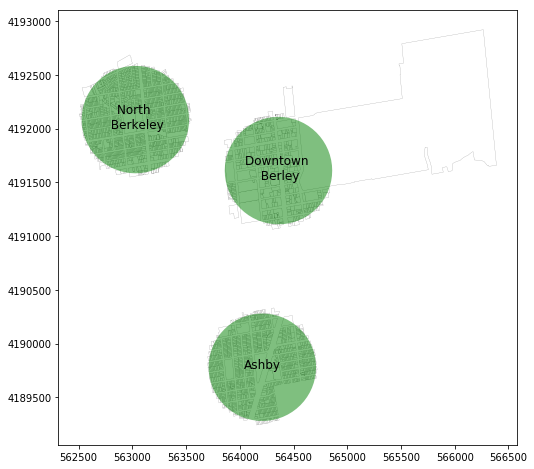

In [110]:
base = bart_parcels.plot(color='white', edgecolor='gray', linewidth=.2)
bart_buffer_df.plot(ax=base, color='green', markersize = 5, alpha=.5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=12)

### Getting Centroids of Parcels and Adding them to the GeoDataFrame, Setting the Geometry Column

In [111]:
parcels_proj['centroid'] = parcels_proj.centroid
parcels_proj = parcels_proj.set_geometry('centroid')
print(parcels_proj.geometry.name)
parcels_proj.head()

centroid


,city,state,lotsqft,zip,streetname,x_min,condo,longitude,y_max,streetnum,...,streetsufx,unit,usedscrp,shape_star,bldgarea,y_min,parcelid,x_max,geometry,centroid
index_left,,,,,,,,,,,,,,,,,,,,,
0,BERKELEY,CA,2925.0,94703,CALIFORNIA,563724.9312,NO,-122.275596,4.188983e+06,3408.0,...,ST,,DOUBLE OR DUPLEX TYPE- 2U,274.451904,2320.0,4.188962e+06,052 143600102,563743.0167,"POLYGON ((563743.0167004069 4188964.865184802,...",POINT (563733.9490707917 4188972.461243896)
1,BERKELEY,CA,3000.0,94703,CALIFORNIA,563758.6227,NO,-122.275217,4.188988e+06,3409.0,...,ST,,SINGLE FAMILY RESIDENTIAL,243.980469,1678.0,4.188969e+06,052 143501200,563776.0498,"POLYGON ((563776.049800408 4188972.073784799, ...",POINT (563767.2550927883 4188978.535165398)
2,BERKELEY,CA,6750.0,94703,SIXTY-SECOND,563706.4447,NO,-122.275786,4.189002e+06,1536.0,...,ST,,DOUBLE OR DUPLEX TYPE- 2U,595.060059,1885.0,4.188960e+06,052 143600200,563727.8409,"POLYGON ((563724.9312004079 4188980.0040848, 5...",POINT (563717.1421787504 4188980.67307758)
3,BERKELEY,CA,3825.0,94703,CALIFORNIA,563721.1548,NO,-122.275633,4.189004e+06,3400.0,...,ST,,FOURPLEX OR TRIPLEX W/SFR,332.613281,2640.0,4.188980e+06,052 143600101,563739.9508,"POLYGON ((563739.9508004077 4188982.6154848, 5...",POINT (563730.5227430228 4188992.082673961)
4,BERKELEY,CA,3750.0,94703,SIXTY-SECOND,563754.9907,NO,-122.275250,4.189010e+06,1600.0,...,ST,,SINGLE FAMILY RESIDENTIAL,335.715088,1694.0,4.188985e+06,052 143501300,563773.4997,"POLYGON ((563773.4997004068 4188987.627584798,...",POINT (563764.2318183609 4188997.545876422)


### Distance Calculations - Vandalism Proximity to BART Stations

Below we use a lamda function to compute the nearest distance of each vandalism case to each of the 3 BART stations, storing the distance to the nearest BART station as a new column in the vandalism GeoDataFrame.

In [112]:
geovandalism_proj['min_dist_to_bart'] = geovandalism_proj.geometry.apply(lambda g: bart_berkeley.distance(g).min())

And now we can plot the vandalism points using a color-ramp scaled by the minimum distance to a BART station.

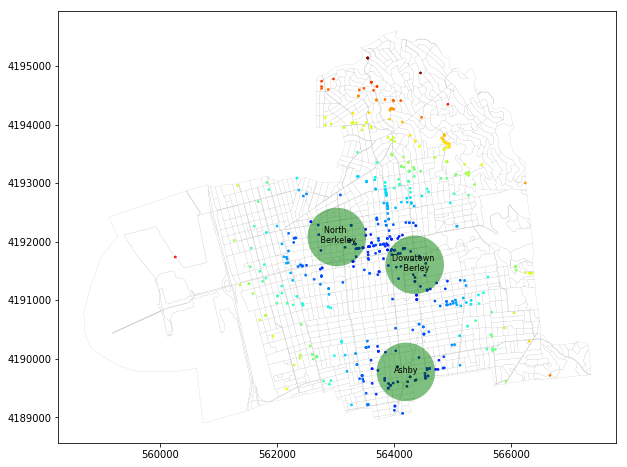

In [113]:
base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
geovandalism_proj.plot(ax=base, column='min_dist_to_bart', cmap='jet', markersize=3)
bart_buffer_df.plot(ax=base, color='green', markersize = 5, alpha=.5)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=8)

### Proximity to BART Stations from Parcels

This is mainly a stress-test to see how well GeoPandas handles larger queries like getting the distance of each parcel in Berkeley to its nearest BART station.

In [114]:
parcels_proj['min_dist_to_bart'] = parcels_proj.geometry.apply(lambda g: bart_berkeley.distance(g).min())

Warning, the map is going to be slow.  Lots of detail.

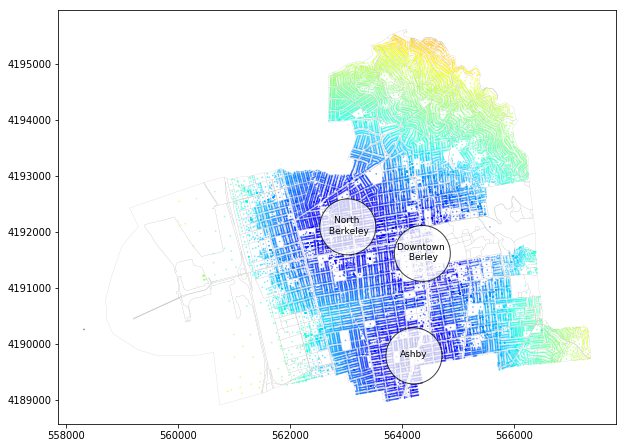

In [115]:
base = base = blocks_proj.plot(color='white', edgecolor='gray', linewidth=.1)
parcels_proj.plot(ax=base, column='min_dist_to_bart', cmap='jet', marker='o', markersize=.5, alpha=.5)
bart_buffer_df.plot(ax=base, color='white', edgecolor='black', markersize = 5, alpha=.75)
for idx, row in bart_buffer_df.iterrows():
    plt.annotate(s=row['bart_buffer_df'], xy=row['coords'],
                 horizontalalignment='center', verticalalignment='center', fontsize=9)

### Getting GeoJson data from an API

Note -- the processing in this step requires a Python library that is not installed in the computer lab.  You can install it on your own computer but because of the way the computer lab is being managed, you cannot install it in the lab.  So just follow these steps as a demo and if you want to run them yourself, install the geojson library on your computer as indicated below.

First, lets retrieve calls to the Berkeley police department from the API endpoint that provides access to a GeoJson result. https://data.cityofberkeley.info/resource/s24d-wsnp.geojson

In [102]:
import json
import requests
import pprint
pp = pprint.PrettyPrinter()
endpoint_url = 'https://data.cityofberkeley.info/resource/s24d-wsnp.geojson'
response = requests.get(endpoint_url)
result = response.text
pp.pprint(result)



('{ "type": "FeatureCollection", "features": '
 '[{"type":"Feature","geometry":null,"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2017-08-20T00:00:00.000",":@computed_region_5s6d_2f32":null,"block_location_zip":null,"state":"CA","cvdow":"0",":@computed_region_x3q3_gi3e":null,"eventtm":"20:06","blkaddr":"UNIVERSITY '
 'AVENUE & M L KING JR WAY","block_location_address":"UNIVERSITY AVENUE & M L '
 'KING JR '
 'WAY","block_location_city":"Berkeley",":@computed_region_3ini_iehf":null,"offense":"NARCOTICS","indbdate":"2017-10-24T03:30:16.000","cvlegend":"DRUG '
 'VIOLATION","caseno":"17049187",":@computed_region_5bih_7r3y":null}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.254054,37.867491]},"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2017-08-17T00:00:00.000",":@computed_region_5s6d_2f32":"1496","block_location_zip":null,"state":"CA","cvdow":"4",":@computed_region_x3q3_gi3e":"2","eventtm":"00:00","blkaddr":"2700 '
 'CH

 'TENTH ST","block_location_address":"1400 TENTH '
 'ST","block_location_city":"Berkeley",":@computed_region_3ini_iehf":"9","offense":"VEHICLE '
 'STOLEN","indbdate":"2017-10-24T03:30:15.000","cvlegend":"MOTOR VEHICLE '
 'THEFT","caseno":"17044616",":@computed_region_5bih_7r3y":"24"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.29814,37.866524]},"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2017-07-23T00:00:00.000",":@computed_region_5s6d_2f32":"1502","block_location_zip":null,"state":"CA","cvdow":"0",":@computed_region_x3q3_gi3e":"8","eventtm":"03:15","blkaddr":"800 '
 'ADDISON ST","block_location_address":"800 ADDISON '
 'ST","block_location_city":"Berkeley",":@computed_region_3ini_iehf":"6","offense":"THEFT '
 'MISD. (UNDER '
 '$950)","indbdate":"2017-10-24T03:30:15.000","cvlegend":"LARCENY","caseno":"17091429",":@computed_region_5bih_7r3y":"11"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.260248,37.856111]},"proper

 '$950)","indbdate":"2017-10-24T03:30:15.000","cvlegend":"LARCENY","caseno":"17042000",":@computed_region_5bih_7r3y":"18"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.268028,37.869363]},"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2017-06-13T00:00:00.000",":@computed_region_5s6d_2f32":"1496","block_location_zip":null,"state":"CA","cvdow":"2",":@computed_region_x3q3_gi3e":"1","eventtm":"19:40","blkaddr":"2200 '
 'SHATTUCK AVE","block_location_address":"2200 SHATTUCK '
 'AVE","block_location_city":"Berkeley",":@computed_region_3ini_iehf":"11","offense":"ASSAULT/BATTERY '
 'MISD.","indbdate":"2017-10-24T03:30:13.000","cvlegend":"ASSAULT","caseno":"17034006",":@computed_region_5bih_7r3y":"32"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.268523,37.873876]},"properties":{"block_location_state":"CA","city":"Berkeley","eventdt":"2017-07-24T00:00:00.000",":@computed_region_5s6d_2f32":"1496","block_location_zip":null,"state":"

In [32]:
data = json.loads(result)
calls = data['features']
pp.pprint(calls[0])

{'geometry': None,
 'properties': {':@computed_region_3ini_iehf': None,
                ':@computed_region_5bih_7r3y': None,
                ':@computed_region_5s6d_2f32': None,
                ':@computed_region_x3q3_gi3e': None,
                'blkaddr': 'UNIVERSITY AVENUE & M L KING JR WAY',
                'block_location_address': 'UNIVERSITY AVENUE & M L KING JR WAY',
                'block_location_city': 'Berkeley',
                'block_location_state': 'CA',
                'block_location_zip': None,
                'caseno': '17049187',
                'city': 'Berkeley',
                'cvdow': '0',
                'cvlegend': 'DRUG VIOLATION',
                'eventdt': '2017-08-20T00:00:00.000',
                'eventtm': '20:06',
                'indbdate': '2017-10-24T03:30:16.000',
                'offense': 'NARCOTICS',
                'state': 'CA'},
 'type': 'Feature'}


In [34]:
#!pip install geojson

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/geojson/


Below we import geojson methods, create a FeatureCollection object from calls, use that to create a GeoDataFrame from the features inside the collection, and then exclude rows with no location information.

In [94]:
from geojson import Feature, Point, FeatureCollection

collection = FeatureCollection(calls)
calls2 = gpd.GeoDataFrame.from_features(collection['features'])
calls2 = calls2[calls2.geometry.isnull()==False]

In [95]:
calls2.head()

,:@computed_region_3ini_iehf,:@computed_region_5bih_7r3y,:@computed_region_5s6d_2f32,:@computed_region_x3q3_gi3e,blkaddr,block_location_address,block_location_city,block_location_state,block_location_zip,caseno,city,cvdow,cvlegend,eventdt,eventtm,geometry,indbdate,offense,state
1,13,30,1496,2,2700 CHANNING WAY,2700 CHANNING WAY,Berkeley,CA,None,17055047,Berkeley,4,FRAUD,2017-08-17T00:00:00.000,00:00,POINT (-122.254054 37.867491),2017-10-24T03:30:16.000,FRAUD/FORGERY,CA
3,8,29,1495,1,1700 UNIVERSITY AVE,1700 UNIVERSITY AVE,Berkeley,CA,None,17028317,Berkeley,4,VANDALISM,2017-05-18T00:00:00.000,14:00,POINT (-122.27733 37.870948),2017-10-24T03:30:11.000,VANDALISM,CA
4,7,31,1501,2,HEARST AVENUE & LE ROY AVE,HEARST AVENUE & LE ROY AVE,Berkeley,CA,None,17061889,Berkeley,4,MOTOR VEHICLE THEFT,2017-10-12T00:00:00.000,19:30,POINT (-122.258289 37.875339),2017-10-24T03:30:17.000,VEHICLE STOLEN,CA
5,11,32,1496,1,2100 SHATTUCK AVE,2100 SHATTUCK AVE,Berkeley,CA,None,17040897,Berkeley,5,LARCENY,2017-07-14T00:00:00.000,12:25,POINT (-122.268285 37.871167),2017-10-24T03:30:15.000,THEFT MISD. (UNDER $950),CA
6,3,15,1495,7,3300 ADELINE ST,3300 ADELINE ST,Berkeley,CA,None,17058448,Berkeley,1,LARCENY - FROM VEHICLE,2017-09-25T00:00:00.000,15:00,POINT (-122.271788 37.84827),2017-10-24T03:30:16.000,THEFT FROM AUTO,CA


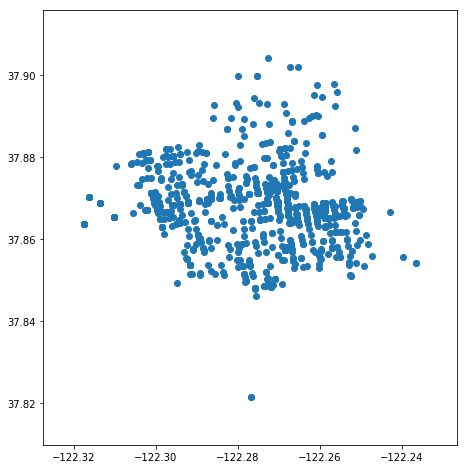

In [96]:
calls2.plot();

In [97]:
calls2.crs = {'init' :'epsg:4326'}
calls2.crs

{'init': 'epsg:4326'}

In [98]:
calls2.crs

{'init': 'epsg:4326'}

In [99]:
calls2 = calls2.to_crs(mtc_crs)

In [100]:
calls_proj = calls2.to_crs(mtc_crs)

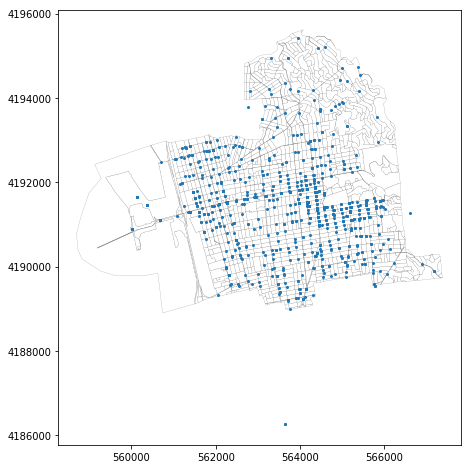

In [126]:
base = blocks_proj.plot(color='white', edgecolor='black', linewidth=.1)
calls_proj.plot(ax=base, markersize=4);

Notice the two points that fall outside the city, especially the one to the south?  Annoying - lets get rid of those.

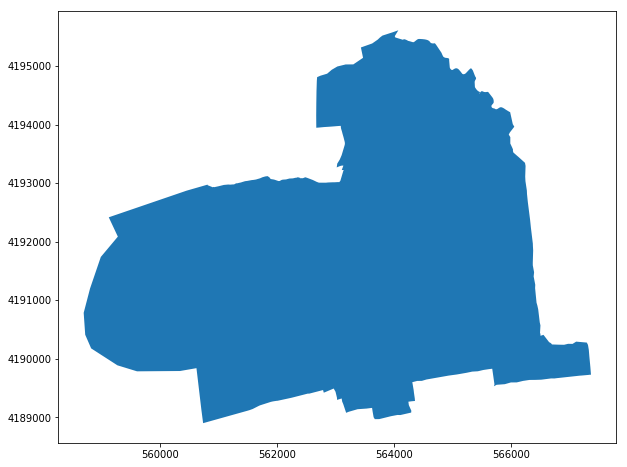

In [118]:
city = blocks_proj.dissolve(by='countyfp10')
city.plot()

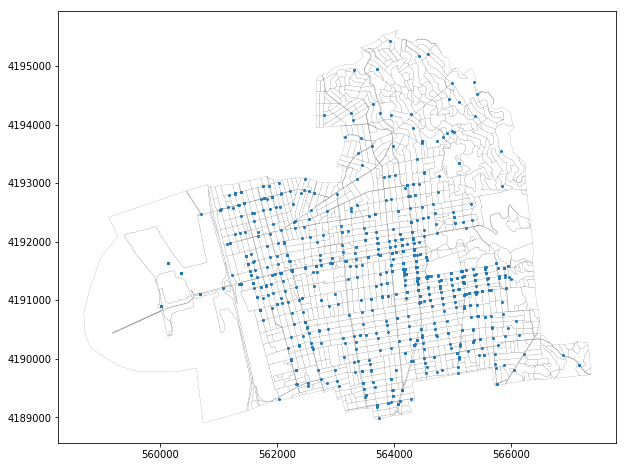

In [128]:
calls_proj2 = gpd.sjoin(calls_proj, city, how='inner')
base = blocks_proj.plot(color='white', edgecolor='black', linewidth=.1)
calls_proj2.plot(ax=base, markersize=4);

### Your Turn

To practice with Geopandas, experiment with the methods covered so far with data you are interested in working with on your project, or any other data you can find readily from an Open Data Portal like Berkeley, San Francisco, Oakland, New York, or others.

* Download a shapefile containing point data and attributes
* Create a GeoDataFrame
* Set its CRS
* Plot it with color coding of the points based on the values of an attribute
* Download a shapefile containing polygons and attributes
* Create a GeoDataFrame
* Plot a Choroplethic Map
* Change the coordinate procjetion on these from spherical to a projected coordinate system
* Do a spatial join of the point and polygon data
* Aggregate the joined data to summarize it
